In [65]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import choice
from scipy.io import loadmat
from sklearn import svm

In [66]:
data1 = loadmat('./ex6data1.mat')
X = data1['X']
y = data1['y']
print(X.shape)
print(y.shape)

(51, 2)
(51, 1)


### 1.1 Example Dataset 1

In [67]:
def plot_data(X, y, label_x, label_y, label_pos, label_neg, axes=None):
    # Find indices of positive and negative examples
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]
    # Plot examples
    if axes == None:
        axes = plt.gca()
    axes.scatter(X[pos][:,0], X[pos][:,1], label=label_pos, marker='+', color='k', linewidth=2)
    axes.scatter(X[neg][:,0], X[neg][:,1], label=label_neg, marker='o', color='y')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

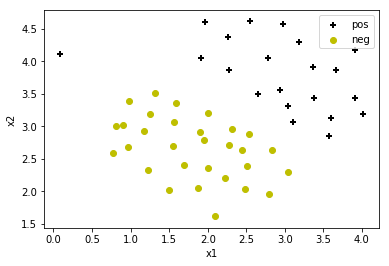

In [68]:
plot_data(X, y, 'x1', 'x2', 'pos', 'neg')

In [69]:
def visualize_boundary_linear(X, y, clf, axes=None):
    if axes is None:
        axes = plt.gca()
        
    W = clf.coef_[0]
    I=  clf.intercept_

    m = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    n = -(W[0]*m + I)/W[1]
    # Plot decision boundary
    axes.plot(m, n, '-b')
    
    # Plot data
    plot_data(X, y, 'x1', 'x2', 'pos', 'neg', axes)
    # Plot support vector
    sv = clf.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='r', marker='o', s=6, linewidths='1')
    plt.title('C = {}, Number of support vectors: {}'.format(clf.get_params()['C'],clf.support_.size))

In [70]:
def train_svm_C(C=1.0):
    clf = svm.SVC(C=C, gamma='auto', kernel='linear')
    clf.fit(X,y.ravel())
    visualize_boundary_linear(X, y, clf)

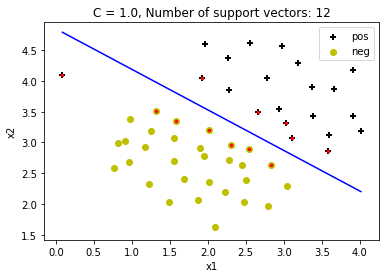

In [71]:
train_svm_C(C=1.0)

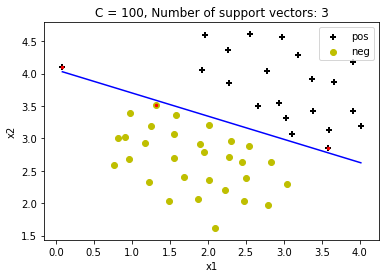

In [72]:
train_svm_C(C=100)

### 1.2.1 Gaussian Kernel

In [73]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum(np.square(x1-x2)))/(2*np.square(sigma)))

In [74]:
x1,x2 = np.array([1,2,1]), np.array([0,4,-1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
print(sim)

0.32465246735834974


### 1.2.2 Example Dataset 2

In [75]:
data2 = loadmat('./ex6data2.mat')
X = data2['X']
y = data2['y']
print(X.shape)
print(y.shape)

(863, 2)
(863, 1)


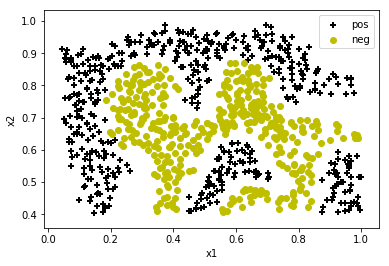

In [76]:
plot_data(X, y, 'x1', 'x2', 'pos', 'neg')

In [79]:
def visualize_boundary(X, y, clf, axes=None):
    if axes is None:
        axes = plt.gca()
    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    pred = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    pred = pred.reshape(X1.shape)
    axes.contourf(X1, X2, pred, cmap=plt.cm.Paired, alpha=0.2)
    plot_data(X, y, 'x1', 'x2', 'pos', 'neg', axes)

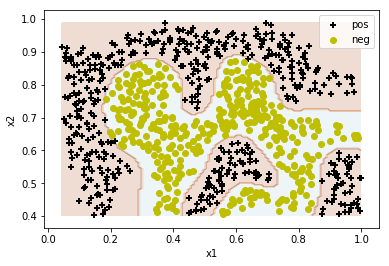

In [80]:
clf = svm.SVC(gamma=200.0, kernel='rbf')
clf.fit(X,y.ravel())
visualize_boundary(X, y, clf)